# Introduction

The aim of further analysis is to build __Random Forest Classifier__ model and compare its performance in regards with already built __Logistic Regression__ model.

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import pylab as pl
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline

import matplotlib as mpl
from scipy import stats

# Data import and structurization

In [26]:
telco_for=pd.read_csv('Churn.csv')
telco_for.TotalCharges = pd.to_numeric(telco_for.TotalCharges, errors=0)

In [27]:
telco_for.dropna(inplace = True)
telco_for.drop(['customerID'], axis=1, inplace=True)
telco_for['SeniorCitizen'] = telco_for['SeniorCitizen'].replace({1:"Yes",0:"No"})

replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
for i in replace_cols : 
    telco_for[i]  = telco_for[i].replace({'No internet service' : 'No'})

telco_for['Churn']=telco_for['Churn'].replace({'Yes':1,'No':0})

In [28]:
telco_for_dummies = pd.get_dummies(telco_for)
telco_for=telco_for_dummies

# Train-Test split

In [29]:
X=telco_for.drop(['Churn'], axis=1)
y=telco_for.Churn
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.25, random_state=1) 

In [30]:
for var in [X_train, X_test, y_train, y_test]:
    print (var.shape)


(5274, 42)
(1758, 42)
(5274,)
(1758,)


# Predictions

The __base Random Forest__ model brings:
<br> __Accuracy:__ &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 0.7960199004975125
<br> __Area under the curve:__ &emsp;&emsp; 0.709791971779972

In order to improve the model, there is a need to look for optimal __number of estimators, maximum number of features and maximum number of each tree depth__. For this reason function was created.

The __final Random Forest__ model improved Accuracy by 2.5% and AUC by more than 4%.

In [14]:
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_for= model_rf.predict(X_test)
predictions_prob=model_rf
print ('Model accuracy:\t\t', metrics.accuracy_score(y_test, prediction_for))
print ('Area under the curve\t', metrics.roc_auc_score(y_test, prediction_for))

Model accuracy:		 0.7770193401592719
Area under the curve	 0.6619110749880083


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [641]:
# Finding hyperparameters for Random Forest using GridSearchCV

#setting the parameters we want to test
params = {'n_estimators' : [30,50,70,80,90],'max_depth' : [4,6,8,10,12,14,16],'max_features': [8,9,10,11,12,14] }

#finding best hyperparameters with cross-validation
gsearch = GridSearchCV(estimator = model_rf, param_grid = params, scoring='roc_auc', cv=5)
gsearch.fit(X_train,y_train)
gsearch.best_score_,gsearch.best_params_

(0.8448290432700944, {'max_depth': 6, 'max_features': 14, 'n_estimators': 90})

In [15]:
model_rf = RandomForestClassifier(random_state=1, n_estimators=90, max_depth=6, max_features=14) 
model_rf.fit(X_train, y_train)

# Make predictions
prediction_for = model_rf.predict(X_test)
predictions_prob=model_rf
print ('model accuracy\t\t', metrics.accuracy_score(y_test, prediction_for))
print ('area under the curve\t', metrics.roc_auc_score(y_test, prediction_for))

model accuracy		 0.8014789533560864
area under the curve	 0.7041001572243244


In [16]:
conf_for=metrics.confusion_matrix(y_test, prediction_for)
conf_for

array([[1178,  116],
       [ 233,  231]], dtype=int64)

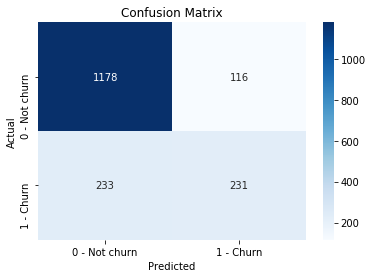

In [17]:
fig, ax = plt.subplots()
ax= plt.subplot()
sns.heatmap(conf_for,annot=True, ax = ax, cmap='Blues', fmt='d')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0 - Not churn', '1 - Churn'])
ax.yaxis.set_ticklabels(['0 - Not churn', '1 - Churn']);

In [18]:
print('Precision:\t\t', metrics.precision_score(y_test, prediction_for))
print('Recall:\t\t\t', metrics.recall_score(y_test, prediction_for))
print('Accuracy:\t\t', metrics.accuracy_score(y_test, prediction_for))
print('Area under the curve:\t', metrics.roc_auc_score(y_test, prediction_for))

Precision:		 0.6657060518731989
Recall:			 0.4978448275862069
Accuracy:		 0.8014789533560864
Area under the curve:	 0.7041001572243244


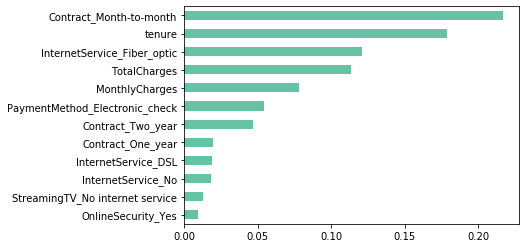

In [19]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                    index=X.columns.values)
weights.sort_values()[-12:].plot(kind = 'barh', cmap='Set2')

# Logistic Regression and Random Forest Classifier comparison

In order to choose model with better performance __Precision, Recall, Accuracy, AUC and Confusion Matrices__ are compared.

In [31]:
telco=pd.read_csv('Churn.csv')
telco.TotalCharges = pd.to_numeric(telco.TotalCharges, errors=0)
telco.dropna(inplace = True)
telco.drop(['customerID', 'MultipleLines', 'StreamingTV', 'StreamingMovies', ], axis=1, inplace=True)

telco['SeniorCitizen'] = telco['SeniorCitizen'].replace({1:"Yes",0:"No"})
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
for i in replace_cols : 
    telco[i]  = telco[i].replace({'No internet service' : 'No'})
telco['Churn']=telco['Churn'].replace({'Yes':1,'No':0})    
telco= pd.get_dummies(telco, drop_first=True)

X=telco.drop(['Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes','InternetService_No','InternetService_Fiber_optic', 
        'InternetService_No', 'TotalCharges','InternetService_Fiber_optic',
       'PaymentMethod_Credit_card', 'PaymentMethod_Mailed_check'], axis=1)
y=telco.Churn
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.25, random_state=1) 

lg=LogisticRegression()
lg.fit(X_train, y_train)
accuracy=lg.score(X_test, y_test)
predictions=lg.predict(X_test)

conf2= metrics.confusion_matrix(y_test, predictions)

metrics.precision_score(y_test, predictions)
metrics.recall_score(y_test, predictions)
metrics.accuracy_score(y_test, predictions)
metrics.roc_auc_score(y_test, predictions)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7203022571017428

# Model Performances

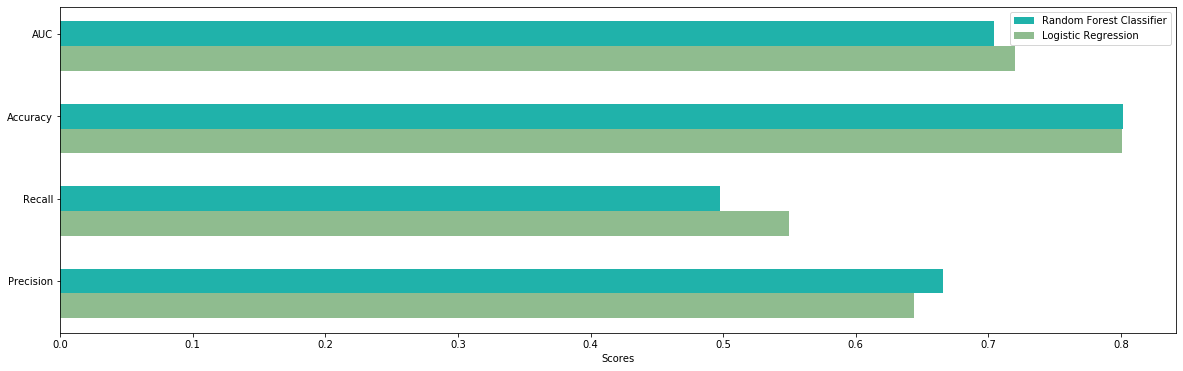

In [32]:
ind=np.arange(4)
width=0.3
height=10
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111)

yvals = [metrics.precision_score(y_test, predictions),
metrics.recall_score(y_test, predictions),
metrics.accuracy_score(y_test, predictions),
metrics.roc_auc_score(y_test, predictions)]
rects1 = ax.barh(ind, yvals, width, color='darkseagreen')

zvals = [metrics.precision_score(y_test, prediction_for),
metrics.recall_score(y_test, prediction_for),
metrics.accuracy_score(y_test, prediction_for),
metrics.roc_auc_score(y_test, prediction_for)]
rects2 = ax.barh(ind+width, zvals, width, color='lightseagreen')


ax.set_yticklabels (('Precision', 'Recall', 'Accuracy', 'AUC'))
ax.set_yticks(ind+width)
ax.set_xlabel( ('Scores'))
ax.legend( (rects2[0], rects1[0]), ('Random Forest Classifier','Logistic Regression') )




# Confusion Matrixes for Models

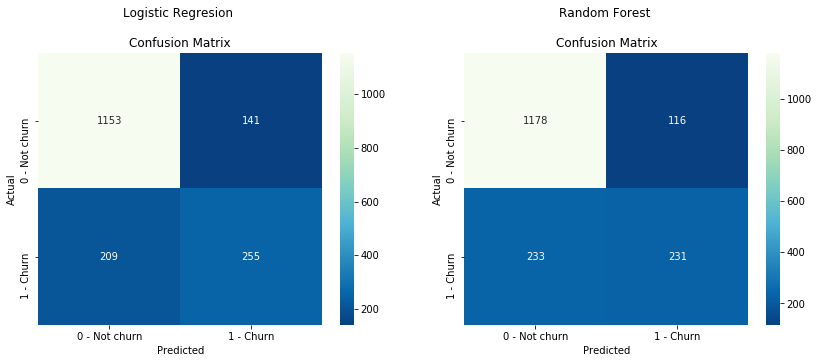

In [33]:
fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(14,5))
ax1.set_title('Logistic Regression')
ax2.set_title('Random Forest Classifier')

sns.heatmap(conf2,annot=True, ax = ax1, cmap='GnBu_r', fmt='d')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual') 
ax1.set_title('Logistic Regresion \n\nConfusion Matrix');
ax1.xaxis.set_ticklabels(['0 - Not churn', '1 - Churn'])
ax1.yaxis.set_ticklabels(['0 - Not churn', '1 - Churn']);

sns.heatmap(conf_for,annot=True, ax = ax2, cmap='GnBu_r', fmt='d')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual') 
ax2.set_title('Random Forest \n\nConfusion Matrix');
ax2.xaxis.set_ticklabels(['0 - Not churn', '1 - Churn'])
ax2.yaxis.set_ticklabels(['0 - Not churn', '1 - Churn']);




# Conclusions

__Random Forest Classifier__ has significantly __higher Precision__ and slightly __better Accuracy__ while __Logistic Regression__ outperforms in __AUC and Recall__. <br> Let's look a bit deeper to the results of confusion matrices. Logistic Regression has slightly less False Negative results (users that were predicted to stay, but left) and slightly more False Positive (users that were predicted to churn, but stayed). This is tradeoff between false negatives and false positives. There is no general rule which mesure is more importhan, thus it is strongly dependent on the problem.
<br> However, with reference to the statement that customer's acquisition cost is significantly higher than retention cost and having only limited information about the problem, it seems that __Logistic Regression suppose to be chosen as the main model__ as it better identifies churns.